<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things



## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
### For this assignment, I decided to work using the SymPy library, the documentation
### of which can be found here: https://docs.sympy.org/latest/index.html

from sympy import *
import numpy as np

x, y, z = symbols("x y z")

### The following function approximates the sum of a convergent alternating series within
### the desired error. 

### We know from calculus that a convergent alternating series can be approximated
### by taking the partial sum (the first n terms), which is within the absolute value of the
### next term (i.e. |a_(n+1)|) of the actual sum of the entire series. That is to say, 
### the sum of the series is between the nth partial sum minus the (n+1)th term
### and the nth partial sum plus the (n+1)th term.

### Side-note: because an alternating series only converges if it's monotonically
### decreasing, the looping logic for this problem is really easy: just check
### successive absolute values to see when our error is small enough, adding intermediate
### values all the while, then returning the result once we've gotten to the desired
### range.

### But, of course, this STILL requires more thought than we in our busy lives can account for,
### and for most of us calculus was a long time ago.

### So let's use Python to make our jobs that much easier. 

def approx_alt_series(math_series, error):
  ### Double-check the first value of the series to see if we need to go any further
  ### in our approximation
  test_error = np.absolute(math_series.subs(x,1))
  i=1
  ### Initialize a variable to store our running approximation.
  approx_sum = math_series.subs(x,i)
  
  ### As noted above, run this loop as long as we need to to get our error within
  ### the appropriate bounds.
  
  while(np.absolute(math_series.subs(x,i)) > error):
    
    i+=1
    approx_sum += math_series.subs(x,i)
    test_error = np.absolute(math_series.subs(x,i))
    
  return approx_sum

test_series = ((-1)**x)*x**-2

print("The sum is approximately: {0}".format(float(approx_alt_series(test_series, .01))))

print("The sum is approximately: {0}".format(float(approx_alt_series(test_series, .001))))  
  
print("The sum is approximately: {0}".format(float(approx_alt_series(test_series, .00001))))



The sum is approximately: -0.8179621756109852
The sum is approximately: -0.8219939961054308
The sum is approximately: -0.8224719933971315


In [0]:
### I had some additional time after completing the code snippet above, so I've 
### been playing around with this set of notebooks about applied math:
### https://github.com/numerical-mooc/numerical-mooc

### I borrowed the following code from the above link. I'll play with it more
### in the next cell.

### I also checked out the material in the differential equations notebook about
### conservation laws, but I didn't copy it so as to avoid cluttering this notebook
### further. It's worth a look, though, lots of interesting material.

"""
Implementation of the functions to compute and plot the flight path of the
phugoid using Lanchester's mode.
The implementation uses the sign convention and formula provided by
Milne-Thomson (1958).
"""

import numpy
from matplotlib import pyplot


# Ignore over/underflow errors that pop up in the `radius_of_curvature`
# function.
# (See http://docs.scipy.org/doc/numpy/reference/generated/numpy.seterr.html
# for more explanations.)
numpy.seterr(all='ignore')


def radius_of_curvature(z, zt, C):
    """
    Returns the radius of curvature of the flight path at any point.
    Parameters
    ----------
    z : float
        Current depth below the reference horizontal line.
    zt : float
        Initial depth below the reference horizontal line.
    C : float
        Constant of integration.
    Returns
    -------
    radius : float
        Radius of curvature.
    """
    return zt / (1 / 3 - C / 2 * (zt / z)**1.5)


def rotate(coords, center=(0.0, 0.0), angle=0.0, mode='degrees'):
    """
    Rotates a point or an array of points
    by a given angle around a given center point.
    Parameters
    ----------
    coords :tuple
        Current x and z positions of the point(s)
        as a tuple of two floats or a tuple of two 1D arrays of floats.
    center : tuple, optional
        Center of rotation (x, z) as a tuple of two floats;
        default: (0.0, 0.0).
    angle : float, optional
        Angle of rotation;
        default: 0.0.
    mode : string, optional
        Set if angle given in degrees or radians;
        choices: ['degrees', 'radians'];
        default: 'degrees'.
    Returns
    -------
    x_new : float or numpy.ndarray
        x position of the rotated point(s)
        as a single float or a 1D array of floats.
    z_new : float or numpy.ndarray
        z position of the rotated point(s)
        as a single float or a 1D array of floats.
    """
    x, z = coords
    xc, zc = center
    if mode == 'degrees':
        angle = numpy.radians(angle)
    x_new = xc + (x - xc) * numpy.cos(angle) + (z - zc) * numpy.sin(angle)
    z_new = zc - (x - xc) * numpy.sin(angle) + (z - zc) * numpy.cos(angle)
    return x_new, z_new


def plot_flight_path(zt, z0, theta0, N=1000):
    """
    Plots the flight path of the glider.
    Parameters
    ----------
    zt : float
        Trim height of the glider.
    z0 : float
        Initial height of the glider.
    theta0 : float
        Initial orientation of the glider (in degrees).
    N : integer, optional
        Number of points used to discretize the path;
        default: 1000.
    """
    # Convert initial angle to radians.
    theta0 = numpy.radians(theta0)
    # Create arrays to store the coordinates of the flight path.
    x, z = numpy.zeros(N), numpy.zeros(N)
    # Set initial conditions.
    x[0], z[0], theta = 0.0, z0, theta0
    # Calculate the constant of integration C.
    C = (numpy.cos(theta) - 1 / 3 * z[0] / zt) * (z[0] / zt)**0.5
    # Set incremental distance along the flight path.
    ds = 1.0
    # Calculate coordinates along the path.
    for i in range(1, N):
        # We use a minus sign for the second coordinate of the normal vector
        # because the z-axis points downwards.
        normal = numpy.array([+ numpy.cos(theta + numpy.pi / 2.0),
                              - numpy.sin(theta + numpy.pi / 2.0)])
        # Get curvature radius and compute center of rotation.
        R = radius_of_curvature(z[i - 1], zt, C)
        center = numpy.array([x[i - 1], z[i - 1]]) + R * normal
        # Set angular increment.
        dtheta = ds / R
        # Calculate new position and update angle.
        x[i], z[i] = rotate((x[i - 1], z[i - 1]),
                            center=center, angle=dtheta, mode='radians')
        theta += dtheta
    # Set the font family and size to use for Matplotlib figures.
    pyplot.rcParams['font.family'] = 'serif'
    pyplot.rcParams['font.size'] = 16
    # Create Matplotlib figure.
    fig, ax = pyplot.subplots(figsize=(9.0, 4.0))
    ax.grid()
    ax.set_title(f'Flight path for $C={C:.3f}$\n' +
                 rf'($z_t={zt:.1f}$, $z_0={z0:.1f}$, ' +
                 rf'$\theta_0={numpy.degrees(theta0):.1f}^o$)')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$z$')
    ax.plot(x, -z, linestyle='-', linewidth=2.0)
    ax.axis('scaled', adjustable='box')
    pyplot.show()

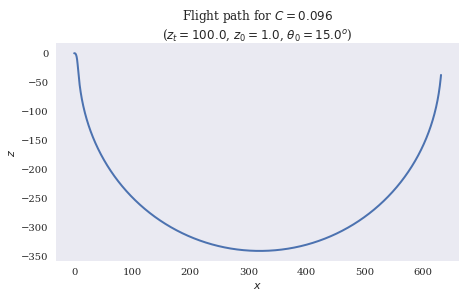

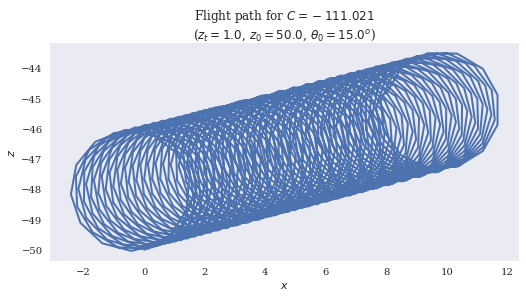

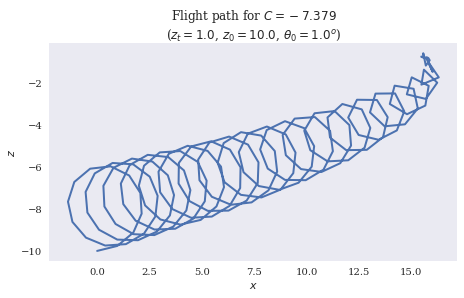

In [10]:
plot_flight_path(100,1,15)

### This one is really cool!

plot_flight_path(1,50,15)

plot_flight_path(1,10,1)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.
 
Because calculus is a painful memory for most of us, I decided to automate one of the murkier, less clear parts of the subject. Now if we'd like to compute the sum of a convergent alternating series (whatever that is) to within a certain error, we can just use this code snippet.

2.  What was the most challenging part of what you did?

Trying to clarify and concisely summarize the steps of the algorithm I already have in my head. In a traditional calculus class, it's okay to omit steps and leave certain things implicit, but of course when trying to write code to perform automated tasks, we must take care to explicitly include (and carefully document) every step.

3.  What was the most interesting thing you learned?

In the pre-course, I played around a bit with different types of regressions, but didn't have a chance to work with Sympy. I'm quite pleased to see how robust it seems to be as a library and set of tools for computing all sorts of interesting things.

4.  What area would you like to explore with more time?

I would definitely like to make the snippet a bit more robust in the future; it would be nice if the snippet computed some approximations for other types of series. It would be even better to see if I could come up with a method to test other types of series for convergence. 

I decided to go with series convergence because, in my experience, it's one of the more difficult things to explain in calculus. Understanding how to tell when a series converges or diverges (or when we can't say for sure) relies, at least at the level of most students, on a level of intuition that can only really be gained by working lots and lots of problems.

But, at least in principle, our brains are themselves but (extremely computationally efficient) machines, and our intuition but an algorithm implicitly derived from our experiences. We ought, then, to be able to slow down our thought processes and record each step carefully. Solving math problems, though more difficult for most of us humans than, say, recognizing an animal as a cat, a dog, or neither, ought to be simpler to implement in a computer than would an algorithm to differentiate between animals. As we progress through the course, I'd like to spend more time thinking about and practicing the translation of my intuitive understanding of things into computable algorithms and, hopefully, vice-versa.

I talked more about this in the Medium post I wrote for the stretch goal: https://medium.com/@will.cotton4/intuition-a4a8abb5d206


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.


## Here are some of the cool things I found when researching this assignment: 
A discussion of conservation laws using Python and differential equations that ranges from conservation of mass to conservation of traffic:

https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_01_conservationLaw.ipynb 

A github repo containing a lot of open-source AI components:

https://github.com/simpleai-team/simpleai

An applied bioinformatics textbook (one of my research interests) in the form of a Jupyter Notebook:

https://mybinder.org/v2/gh/applied-bioinformatics/built-iab/master?filepath=IAB-notebooks/index.ipynb


## Here's a Medium post I wrote: https://medium.com/@will.cotton4/intuition-a4a8abb5d206
